**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ IMPORTING NECESSARY LIBRARIES AND DEPENDENCIES:
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
from keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from keras.callbacks import LearningRateScheduler

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

**VGG ARCHITECTURE:**
- I will define the build method of Mini VGGNet architecture below. It requires four parameters: width of input image, height of input image, depth of image, number of class labels in the classification task. The Sequential class, the building block of sequential networks sequentially stack one layer on top of the other layer initialized below. Batch Normalization operates over the channels, so in order to apply BN, we need to know which axis to normalize over. 

In [4]:
#@ DEFINING VGGNET ARCHITECTURE:
class MiniVGGNet:                                               # Defining VGG Network. 
    @staticmethod
    def build(width, height, depth, classes):                   # Defining Build Method. 
        model = Sequential()                                    # Initializing Sequential Model.
        inputShape = (width, height, depth)                     # Initializing Input Shape. 
        chanDim = -1                                            # Index of Channel Dimension.
        if K.image_data_format() == "channels_first":
            inputShape = (depth, width, height)                 # Initializing Input Shape. 
            chanDim = 1                                         # Index of Channel Dimension. 
        model.add(Conv2D(32, (3, 3), padding='same', 
                         input_shape=inputShape))               # Adding Convolutional Layer. 
        model.add(Activation("relu"))                           # Adding RELU Activation Function. 
        model.add(BatchNormalization(axis=chanDim))             # Adding Batch Normalization Layer. 
        model.add(Conv2D(32, (3, 3), padding='same'))           # Adding Convolutional Layer. 
        model.add(Activation("relu"))                           # Adding RELU Activation Function. 
        model.add(BatchNormalization(axis=chanDim))             # Adding Batch Normalization Layer. 
        model.add(MaxPooling2D(pool_size=(2, 2)))               # Adding Max Pooling Layer. 
        model.add(Dropout(0.25))                                # Adding Dropout Layer.
        model.add(Conv2D(64, (3, 3), padding="same"))           # Adding Convolutional Layer. 
        model.add(Activation("relu"))                           # Adding RELU Activation Function. 
        model.add(BatchNormalization(axis=chanDim))             # Adding Batch Normalization Layer. 
        model.add(Conv2D(64, (3, 3), padding='same'))           # Adding Convolutional Layer. 
        model.add(Activation("relu"))                           # Adding RELU Activation Function. 
        model.add(BatchNormalization(axis=chanDim))             # Adding Batch Normalization Layer. 
        model.add(MaxPooling2D(pool_size=(2, 2)))               # Adding Max Pooling Layer. 
        model.add(Dropout(0.25))                                # Adding Dropout Layer.  
        model.add(Flatten())                                    # Adding Flatten Layer. 
        model.add(Dense(512))                                   # Adding FC Dense Layer. 
        model.add(Activation("relu"))                           # Adding Activation Layer. 
        model.add(BatchNormalization())                         # Adding Batch Normalization Layer. 
        model.add(Dropout(0.5))                                 # Adding Dropout Layer. 
        model.add(Dense(classes))                               # Adding Dense Output Layer. 
        model.add(Activation("softmax"))                        # Adding Softmax Layer. 
        return model

In [6]:
#@ CUSTOM LEARNING RATE SCHEDULER: 
def step_decay(epoch):                          # Definig step decay function. 
    initAlpha = 0.01                            # Initializing initial LR.
    factor = 0.25                               # Initializing drop factor. 
    dropEvery = 5                               # Initializing epochs to drop. 
    alpha = initAlpha*(factor ** np.floor((1 + epoch) / dropEvery))
    return float(alpha)

**VGGNET ON CIFAR10**

In [7]:
#@ GETTING THE DATASET:
((trainX, trainY), (testX, testY)) = cifar10.load_data()            # Loading Dataset. 
trainX = trainX.astype("float") / 255.0                             # Normalizing Dataset. 
testX = testX.astype("float") / 255.0                               # Normalizing Dataset. 

#@ PREPARING THE DATASET:
lb = LabelBinarizer()                                               # Initializing LabelBinarizer. 
trainY = lb.fit_transform(trainY)                                   # Converting Labels to Vectors. 
testY = lb.transform(testY)                                         # Converting Labels to Vectors. 
labelNames = ["airplane", "automobile", "bird", "cat", "deer", 
              "dog", "frog", "horse", "ship", "truck"]              # Initializing LabelNames.

In [8]:
#@ INITIALIZING OPTIMIZER AND MODEL: 
callbacks = [LearningRateScheduler(step_decay)]                        # Initializing Callbacks. 
opt = SGD(0.01, nesterov=True, momentum=0.9)                           # Initializing SGD Optimizer. 
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)     # Initializing VGGNet Architecture. 
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])                                    # Compiling VGGNet Model. 
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), batch_size=64, 
              epochs=40, verbose=1, callbacks=callbacks)               # Training VGGNet Model.

Epoch 1/40
782/782 [==============================] - 29s 21ms/step - loss: 1.6339 - accuracy: 0.4555 - val_loss: 1.1509 - val_accuracy: 0.5970 - lr: 0.0100
Epoch 2/40
782/782 [==============================] - 16s 21ms/step - loss: 1.1813 - accuracy: 0.5932 - val_loss: 0.9222 - val_accuracy: 0.6733 - lr: 0.0100
Epoch 3/40
782/782 [==============================] - 16s 21ms/step - loss: 0.9908 - accuracy: 0.6567 - val_loss: 0.8341 - val_accuracy: 0.7159 - lr: 0.0100
Epoch 4/40
782/782 [==============================] - 16s 21ms/step - loss: 0.8854 - accuracy: 0.6945 - val_loss: 0.8282 - val_accuracy: 0.7167 - lr: 0.0100
Epoch 5/40
782/782 [==============================] - 16s 21ms/step - loss: 0.7380 - accuracy: 0.7421 - val_loss: 0.6881 - val_accuracy: 0.7598 - lr: 0.0025
Epoch 6/40
782/782 [==============================] - 17s 21ms/step - loss: 0.6845 - accuracy: 0.7586 - val_loss: 0.6600 - val_accuracy: 0.7711 - lr: 0.0025
Epoch 7/40
782/782 [==============================] - 17s 

**MODEL EVALUATION:**

In [9]:
#@ INITIALIZING MODEL EVALUATION:
predictions = model.predict(testX, batch_size=64)           # Getting Model Predictions. 
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), 
                            target_names=labelNames))       # Inspecting Classification Report.

              precision    recall  f1-score   support

    airplane       0.85      0.79      0.82      1000
  automobile       0.90      0.88      0.89      1000
        bird       0.73      0.65      0.69      1000
         cat       0.62      0.60      0.61      1000
        deer       0.72      0.81      0.76      1000
         dog       0.71      0.71      0.71      1000
        frog       0.80      0.89      0.84      1000
       horse       0.87      0.82      0.85      1000
        ship       0.89      0.89      0.89      1000
       truck       0.85      0.88      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



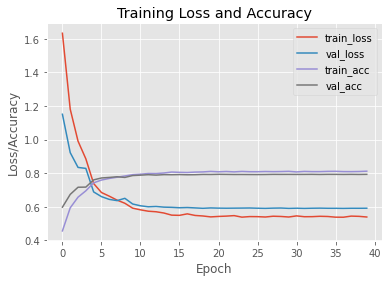

In [10]:
#@ INSPECTING TRAINING LOSS AND ACCURACY:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show();

**Note:**
- Batch Normalization can lead to a faster, more stable convergence with higher accuracy. 
- Batch Normalization will require more wall time to train the network even though the network will obtain higher accuracy in less epochs. 